> ### Note on Labs and Assigments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 5: EDA

## Outline

- Univariate analysis (distributions, histograms, counts)
- Bivariate analysis (correlations, scatterplots, group comparisons)
- Reflections and insights

This lab uses the same dataset from **Lab 4**. You will see some overlap in the initial tasks as the data is cleaned.  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you have any questions about Colab, you can read more here:  
https://research.google.com/colaboratory/faq.html


## Dataset Overview

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     | Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1)|
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Data

### Instructions:
- Import the `pandas` library for dataframes.  Then `Matplotlib` and `Seaborn` for data visualization.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [20]:
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


## Part 2: Inspecting & Basic Cleaning

### Instructions:
- Identify missing values.
- Check data types are correct(e.g., dates, numeric columns).
- Check for outliers key numeric variables like `price`, `sqft`, `beds`, or `baths`.  The concept of outliers will be covered more in week 6.  This week we will do only a very basic filter for outlier values.   

### Think about:
- Are there missing values?
- Do the data types look appropriate?
- Do any numeric variables contain extreme or unusual values?


In [21]:
# Check for missing values
df.isnull().sum()

,0
post_id,0
date,0
year,0
nhood,0
city,0
county,1394
price,0
beds,6608
baths,158121
sqft,136117


In [22]:
# Basic summary statistics
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,200796.000000,194188.000000,42675.000000,64679.000000
mean,2135.362746,1.889025,1.679086,1201.827688
std,1427.747903,1.079138,0.690509,5000.217864
min,220.000000,0.000000,1.000000,80.000000
25%,1295.000000,1.000000,1.000000,750.000000
50%,1800.000000,2.000000,2.000000,1000.000000
75%,2505.000000,3.000000,2.000000,1360.000000
max,40000.000000,12.000000,8.000000,900000.000000


In [23]:
# Check data types
df.dtypes

,0
post_id,object
date,int64
year,int64
nhood,object
city,object
county,object
price,int64
beds,float64
baths,float64
sqft,float64


In [24]:
# Remove price outliers (1st–99th percentile)
q_low = df['price'].quantile(0.01)
q_high = df['price'].quantile(0.99)
df = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

## Part 3: Basic Exploration

Use `groupby` and `value_counts` to summarize trends across neighborhoods and cities.


In [25]:
# Average price by neighborhood
df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)

,price
nhood,
inverness,5310.000000
tiburon / belvedere,3470.911197
SOMA / south beach,3450.726223
financial district,3431.484935
saratoga,3393.803279
west portal / forest hills,3302.753388
NOPA,3186.456667
pacific heights,3022.314860
candlestick point,3011.316239


In [26]:
# Top cities by count
df['city'].value_counts().head(10)

,count
city,
san francisco,54264
san jose,13564
oakland,9308
santa rosa,6163
santa cruz,5407
san mateo,5094
sunnyvale,4480
mountain view,4382
santa clara,4132


## Part 4: Univariate Analysis

Explore individual variables to understand their distributions and frequency.

### Tasks:
- Plot histograms for numeric variables (`price`, `sqft`)
- Plot countplots for categorical variables (`beds`, `nhood`)


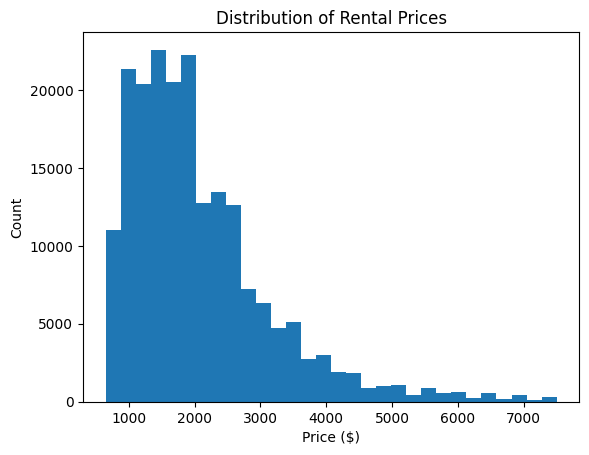

In [27]:
# Histogram: Price
plt.hist(df['price'], bins=30)
plt.title("Distribution of Rental Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

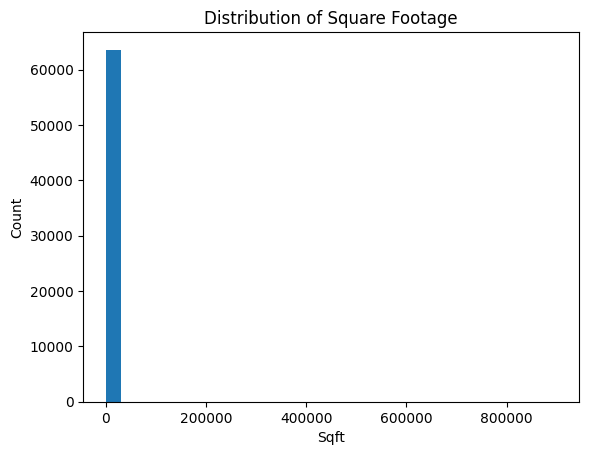

In [28]:
# Histogram: Square Footage
plt.hist(df['sqft'].dropna(), bins=30)
plt.title("Distribution of Square Footage")
plt.xlabel("Sqft")
plt.ylabel("Count")
plt.show()


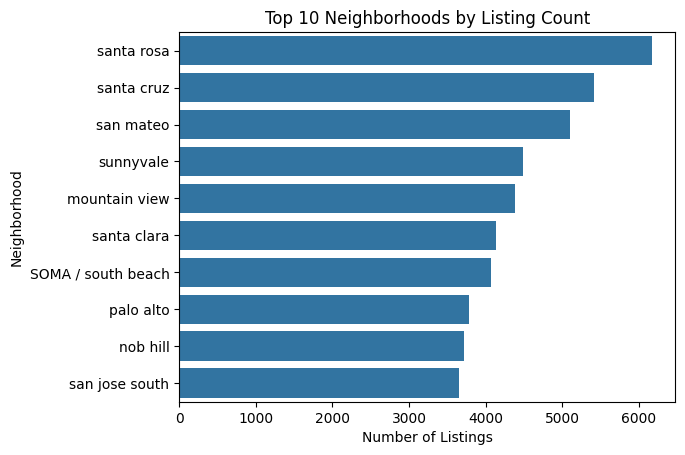

In [29]:
# Bar plot of top 10 neighborhoods by number of listings
top_nhoods = df['nhood'].value_counts().head(10)

sns.barplot(x=top_nhoods.values, y=top_nhoods.index)
plt.title("Top 10 Neighborhoods by Listing Count")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.show()

### 🔧 Try It Yourself – Part 4

1. Create two new visualizations using different variables than the ones already shown above.

>Suggestions:
- A **histogram** of the `baths` variable
- A **bar chart** showing the **average square footage by number of bathrooms**

> Be sure to label your axes and include a title for each chart.

2. After creating the visuals, write 1–2 sentences explaining what you notice in each.


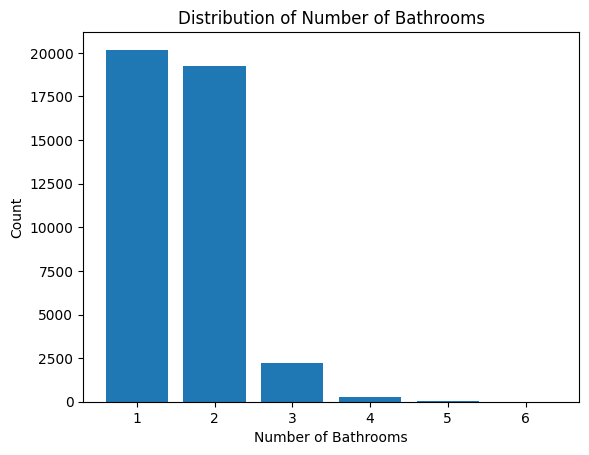

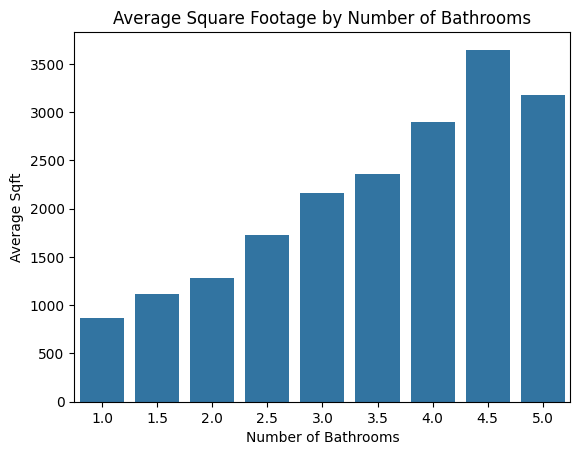

In [30]:
# Visual 1 🔧: Histogram of baths
plt.hist(df['baths'].dropna(), bins=range(int(df['baths'].min()), int(df['baths'].max()) + 2), align='left', rwidth=0.8)
plt.title("Distribution of Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.xticks(range(int(df['baths'].min()), int(df['baths'].max()) + 1))
plt.show()

# Visual 2 🔧: Average square footage by number of bathrooms
avg_sqft_baths = df.groupby('baths')['sqft'].mean().dropna()
sns.barplot(x=avg_sqft_baths.index, y=avg_sqft_baths.values)
plt.title("Average Square Footage by Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Sqft")
plt.show()

🔧 Visual 1 comment:  Visual 1 comment: The histogram shows that most rentals have 1 or 2 bathrooms, with a rapid decrease in count as the number of bathrooms increases.

🔧 Visual 2 comment: The bar chart indicates a clear trend: as the number of bathrooms increases, the average square footage of the rental property also tends to increase.

## Part 5: Bivariate Analysis

Explore relationships between two variables to understand how features like square footage or bedrooms influence price.


In [31]:
# Correlation matrix
corr_matrix = df[['price', 'beds', 'baths', 'sqft']].corr()
corr_matrix


,price,beds,baths,sqft
price,1.000000,0.453705,0.401660,0.053968
beds,0.453705,1.000000,0.643754,0.703357
baths,0.401660,0.643754,1.000000,0.629468
sqft,0.053968,0.703357,0.629468,1.000000


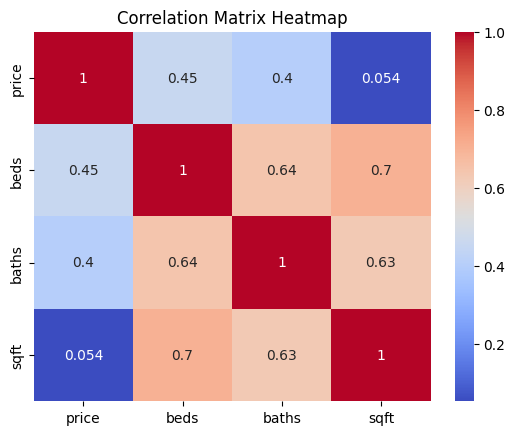

In [32]:
# Heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

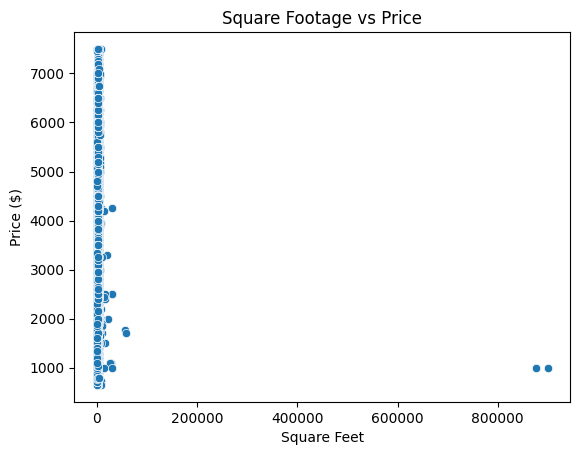

In [33]:
# Scatterplot: Square Footage vs Price
sns.scatterplot(x='sqft', y='price', data=df)
plt.title("Square Footage vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.show()

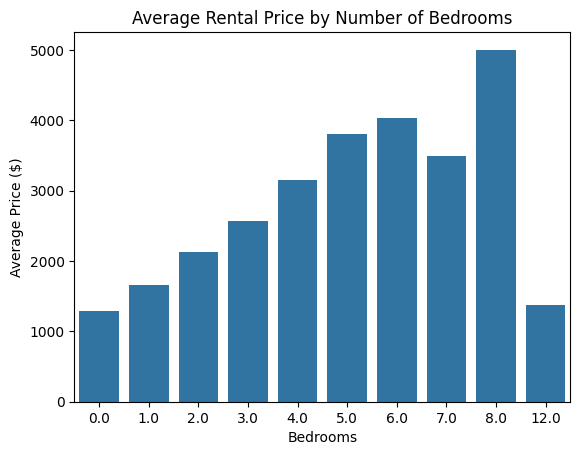

In [34]:
# Average price by number of bedrooms
avg_price_beds = df.groupby('beds')['price'].mean().sort_index()
sns.barplot(x=avg_price_beds.index, y=avg_price_beds.values)
plt.title("Average Rental Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price ($)")
plt.show()

### 🔧 Try It Yourself – Part 5

1. Create a scatterplot of `baths` vs `price`.  
2. Group by `year` and plot the average price over time.
3. What trends or outliers do you see?

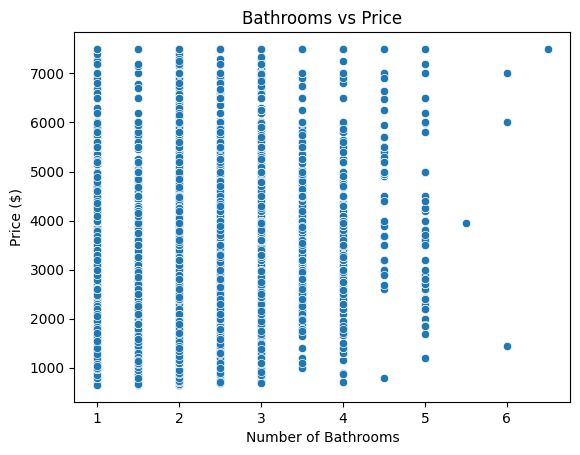

In [36]:
#1 🔧: Scatterplot of baths vs price
sns.scatterplot(x='baths', y='price', data=df.dropna(subset=['baths', 'price']))
plt.title("Bathrooms vs Price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price ($)")
plt.show()

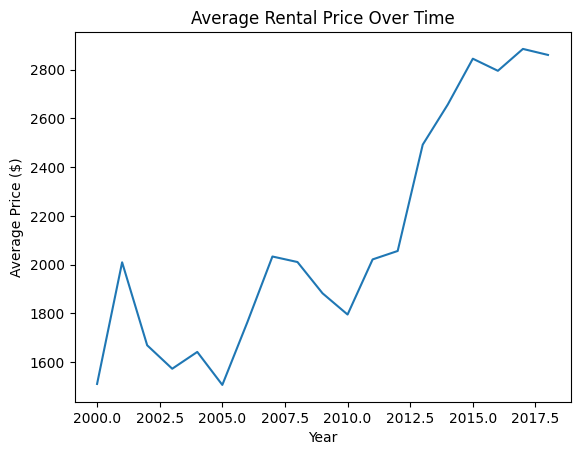

In [37]:
#2 🔧: Average price by year
avg_price_year = df.groupby('year')['price'].mean()
sns.lineplot(x=avg_price_year.index, y=avg_price_year.values)
plt.title("Average Rental Price Over Time")
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.show()

🔧 Add comment here: Based on the scatterplot of bathrooms vs price, there appears to be a positive trend, where price generally increases with the number of bathrooms. The line plot of average price over time shows some fluctuations, but an overall upward trend in rental prices from 2000 to 2018.

## 🔧  Part 6: Reflection

Answer the following questions in the markdown cell below (no more than a few sentences per question required)

1. Which variables are most strongly correlated with rental price?
2. Are there patterns in how size (sqft) or number of bedrooms affects price?
3. Which neighborhoods or years show the highest prices?
4. What other visualizations or groupings might improve this analysis?

Use this section to summarize insights from both Labs 4 and 5.

🔧 Add refections here:
1. Based on the correlation matrix, beds and baths show the strongest positive correlation with price.
2. Yes, there are patterns. As the number of bedrooms (beds) and bathrooms (baths) increase, the average price tends to increase as well. The scatterplot of sqft vs price shows a general upward trend, though with significant variability.
3. From the earlier analysis, "inverness" appears to have the highest average rental price among the top neighborhoods by average price. The average price over time shows an overall upward trend, with some fluctuations, peaking around 2017-2018.
4. Other visualizations that might improve this analysis include box plots to visualize the distribution of price by the number of bedrooms or bathrooms, scatterplots of sqft vs price colored by city or neighborhood to see spatial patterns, and possibly analyzing the text data (title, descr, details) to identify common keywords associated with high or low prices. Grouping by city and then neighborhood could also provide more granular insights into price variations within different areas.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [38]:
!jupyter nbconvert --to html "lab_05_ChristensenBryson.ipynb"

[NbConvertApp] Converting notebook lab_05_ChristensenBryson.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 710067 bytes to lab_05_ChristensenBryson.html
